In [1]:
from glob import glob
import numpy as np
import cv2

from tqdm import tqdm
import matplotlib as mpl
import matplotlib.pyplot as plt
import collections

In [2]:
plt.rcParams["figure.figsize"] = (20,20)

In [16]:
filename = '/Volumes/Public/astroYe/监控/raw/2021_05_18-thunder/00010000538001200.mp4'
thres = 10000

  7%|▋         | 780/11950 [00:15<03:37, 51.44it/s]

782


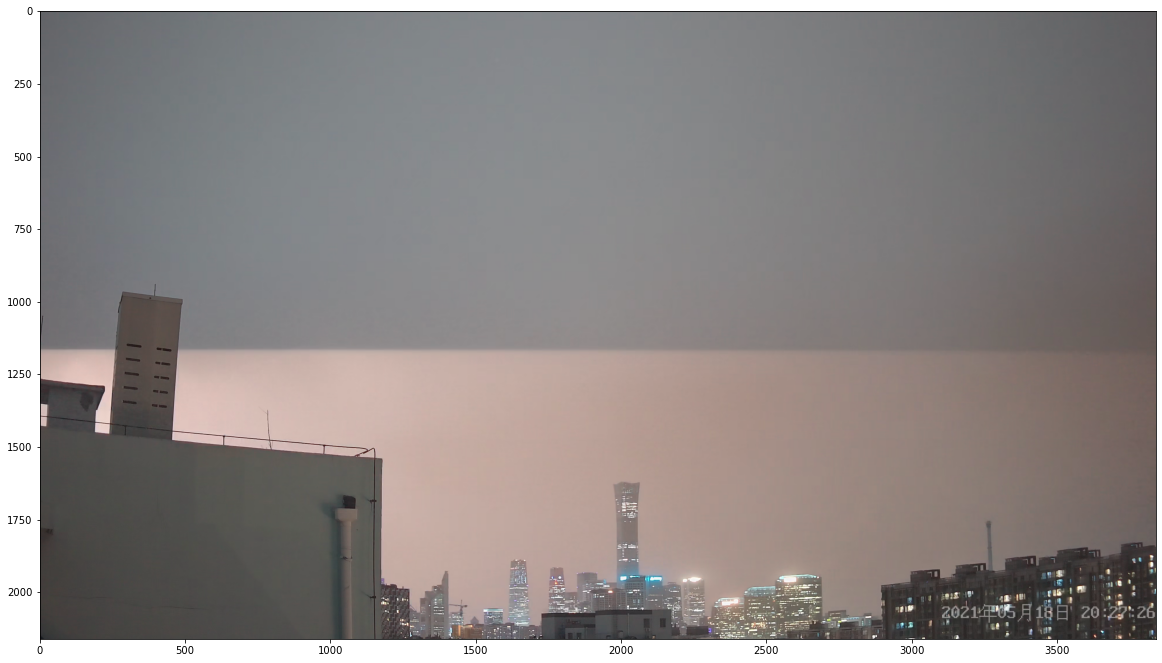

783


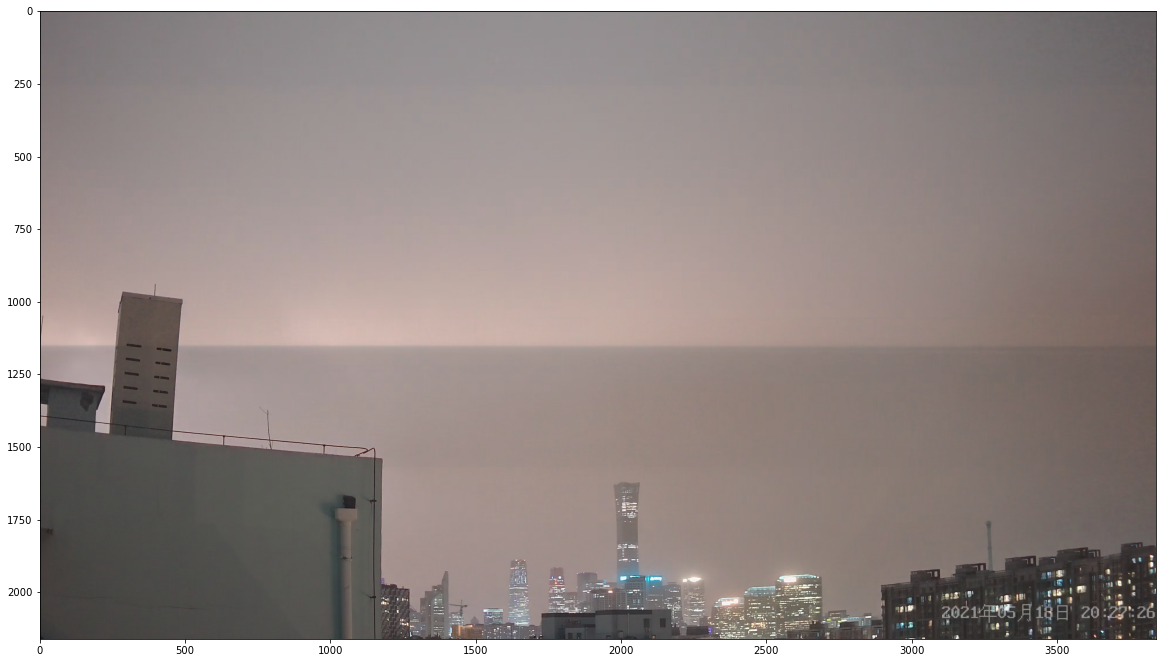

  7%|▋         | 786/11950 [00:17<22:47,  8.16it/s]

786


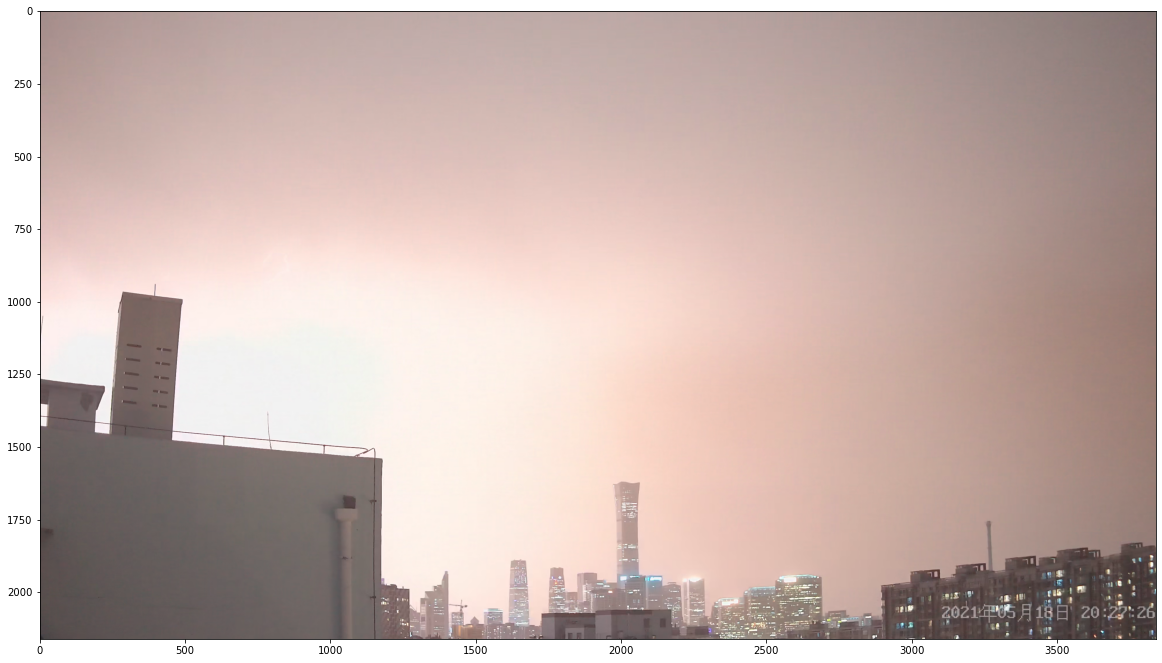

787


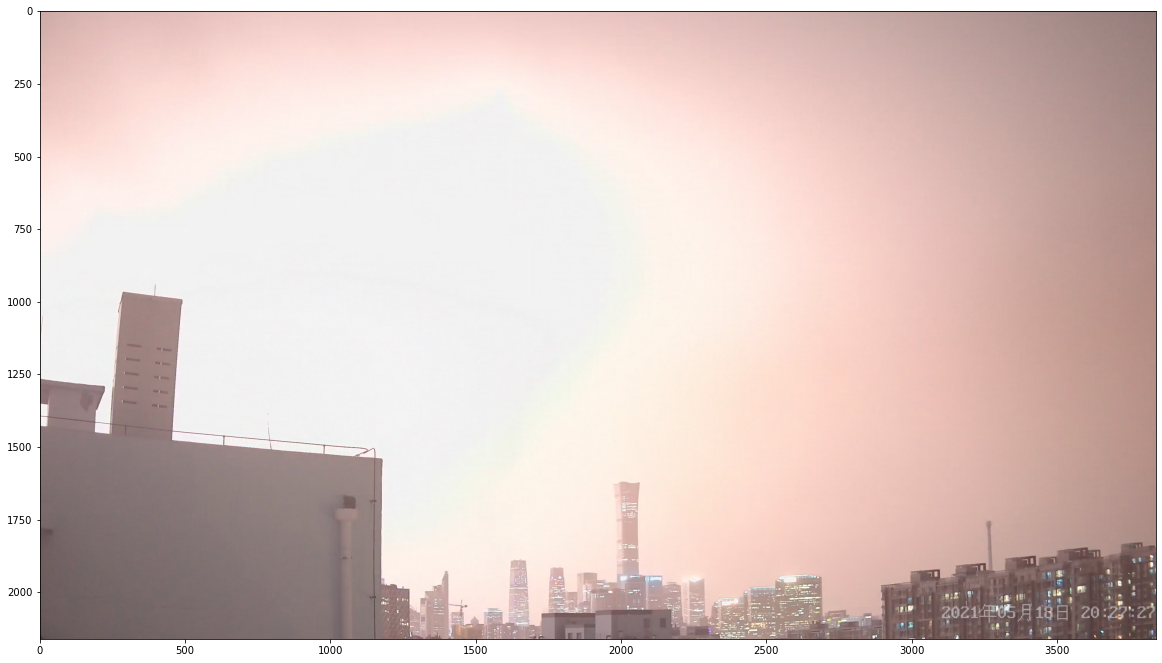

788


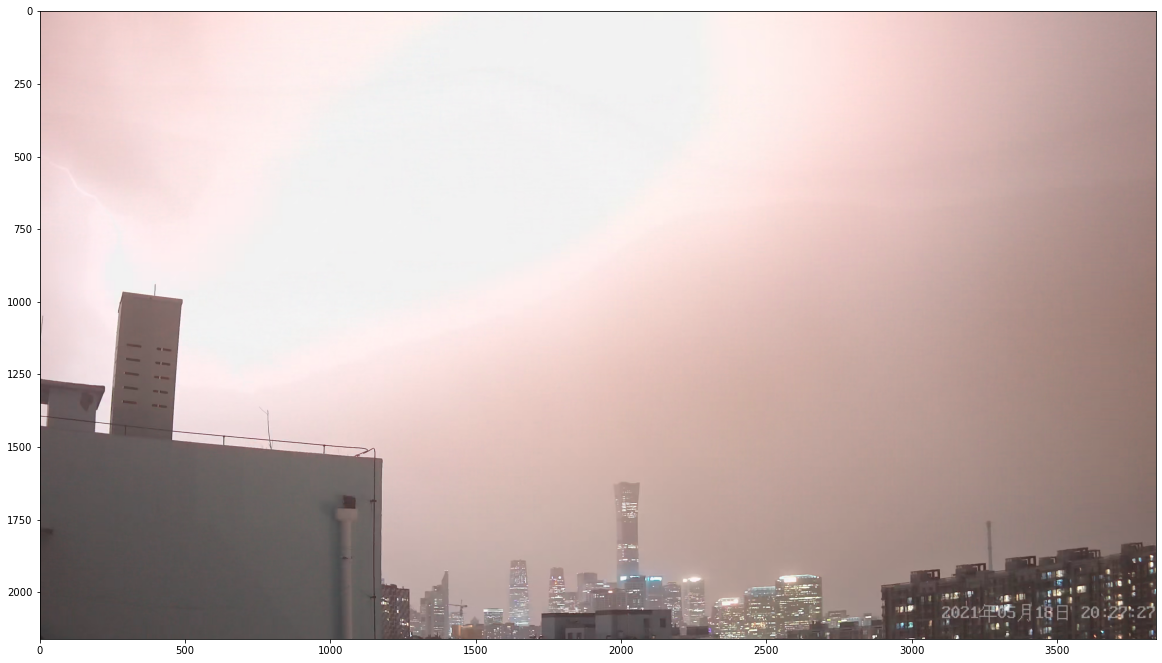

  7%|▋         | 790/11950 [00:20<52:45,  3.53it/s]

790


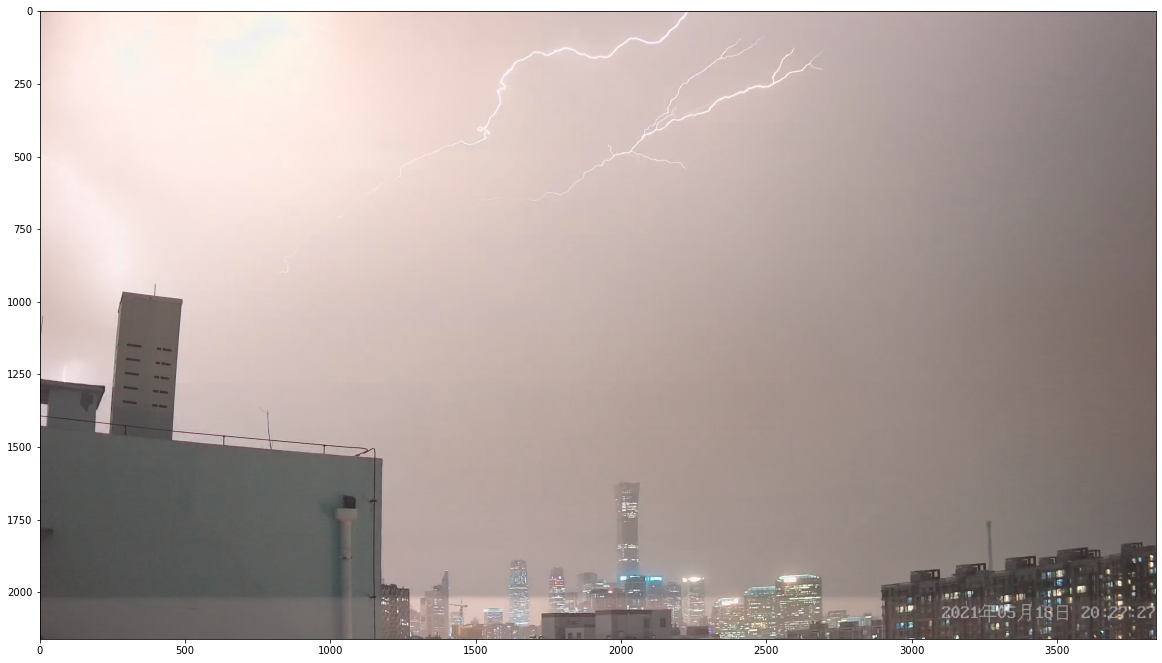

791


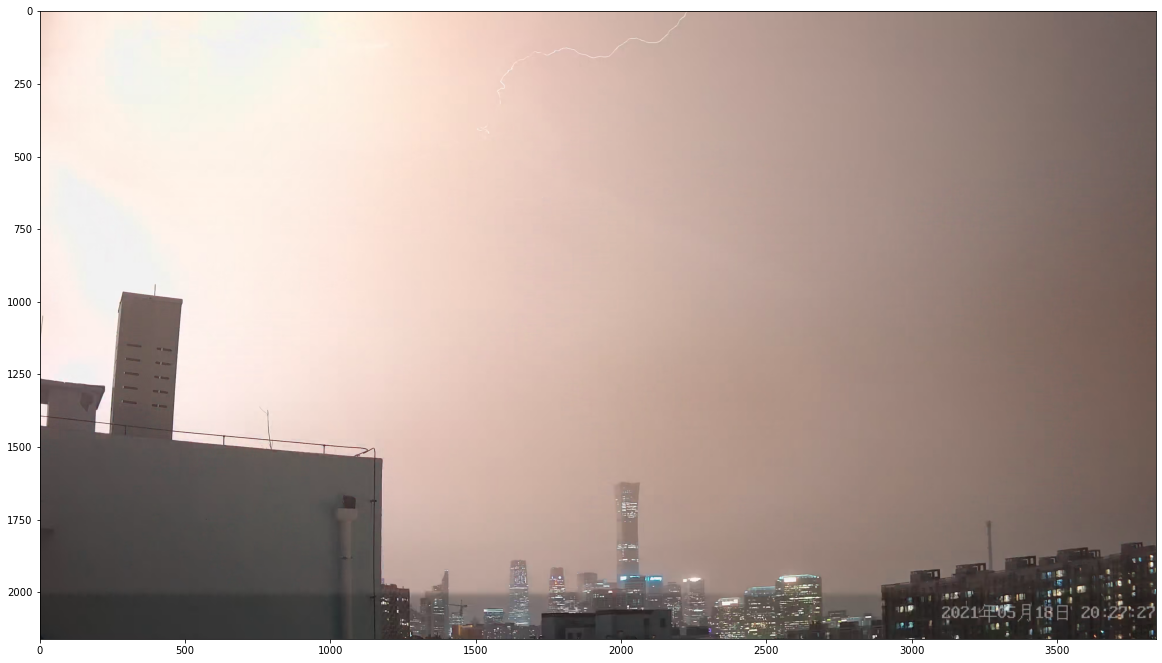

  7%|▋         | 805/11950 [00:22<30:10,  6.15it/s]  

806


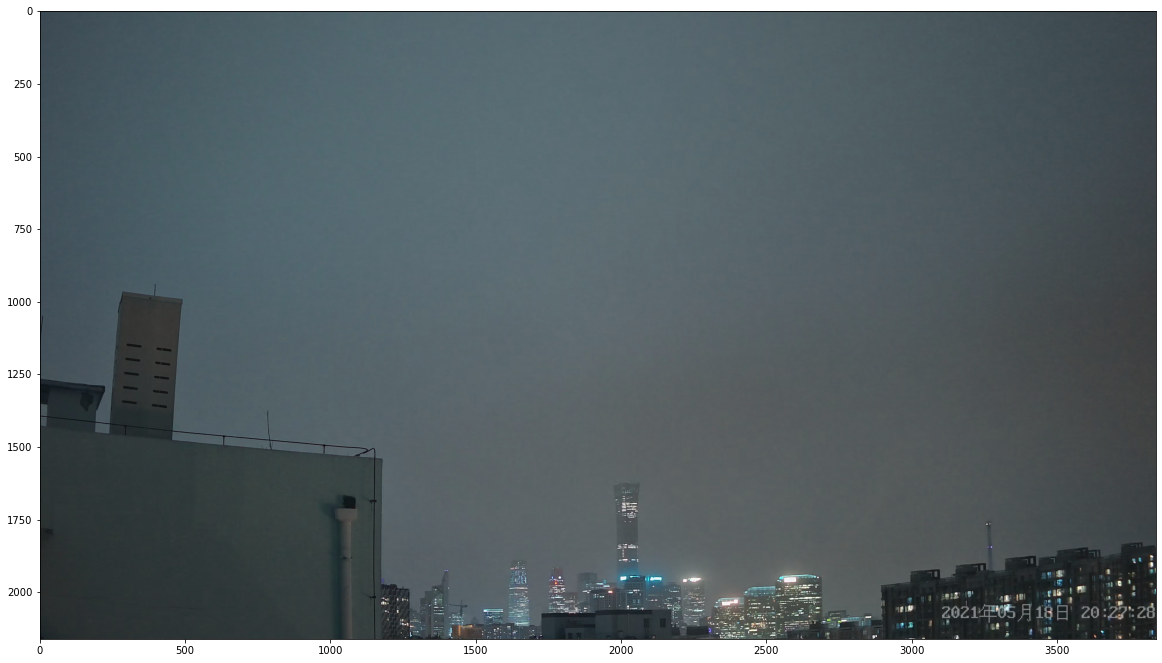

807


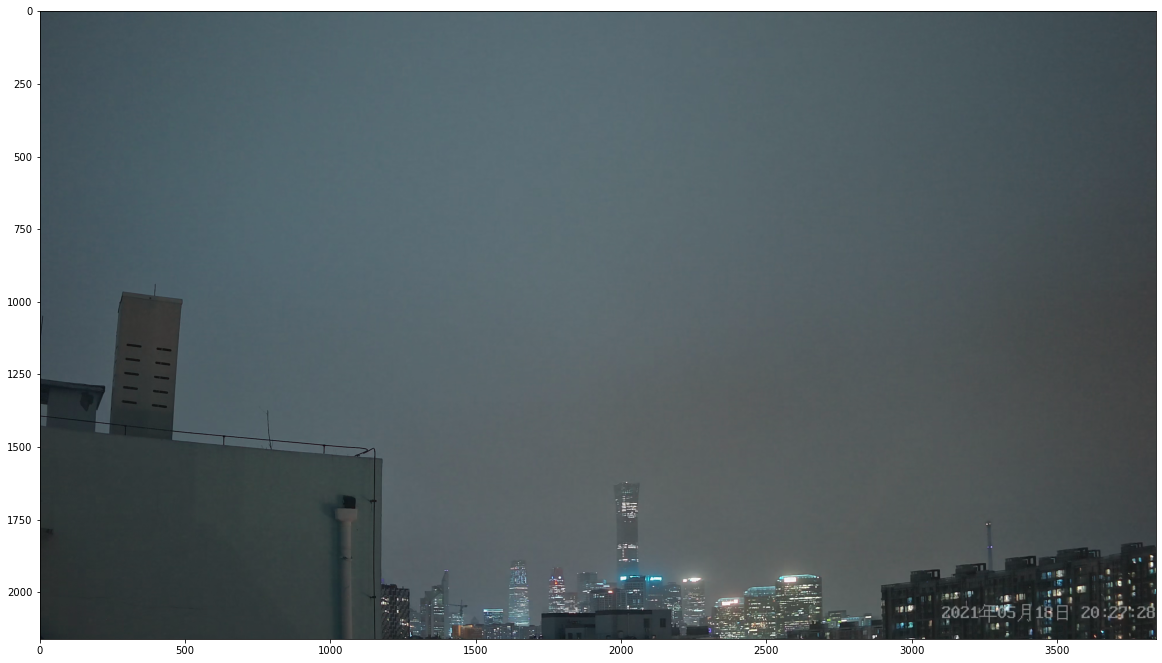

808


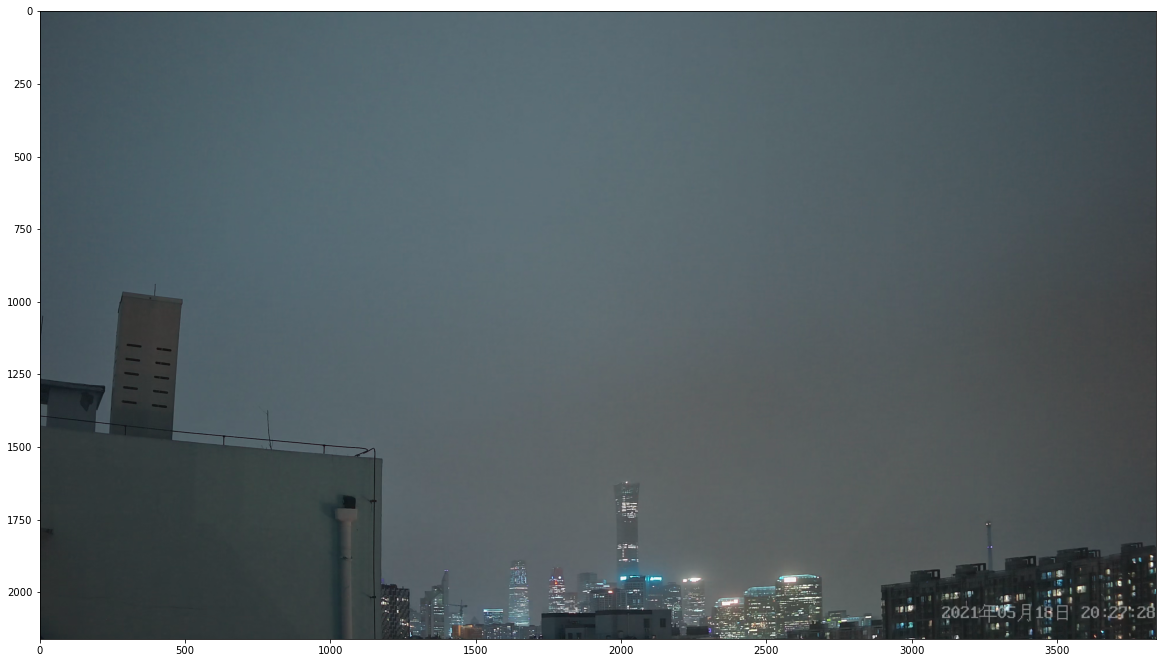

  7%|▋         | 809/11950 [00:26<59:07,  3.14it/s]

809


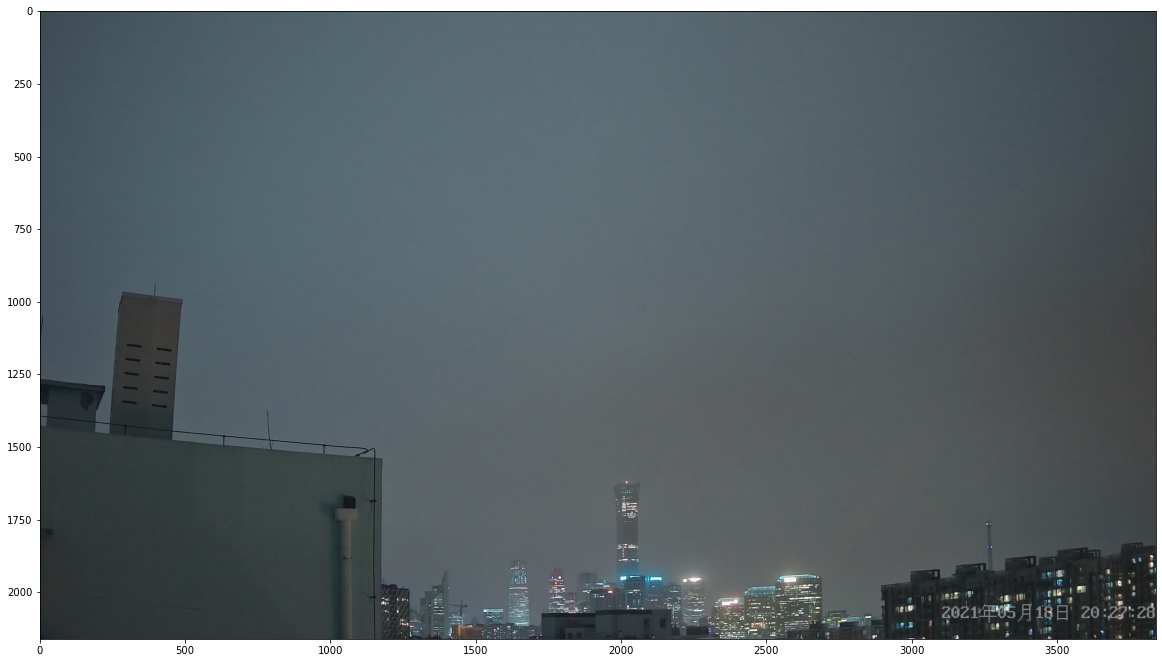

810


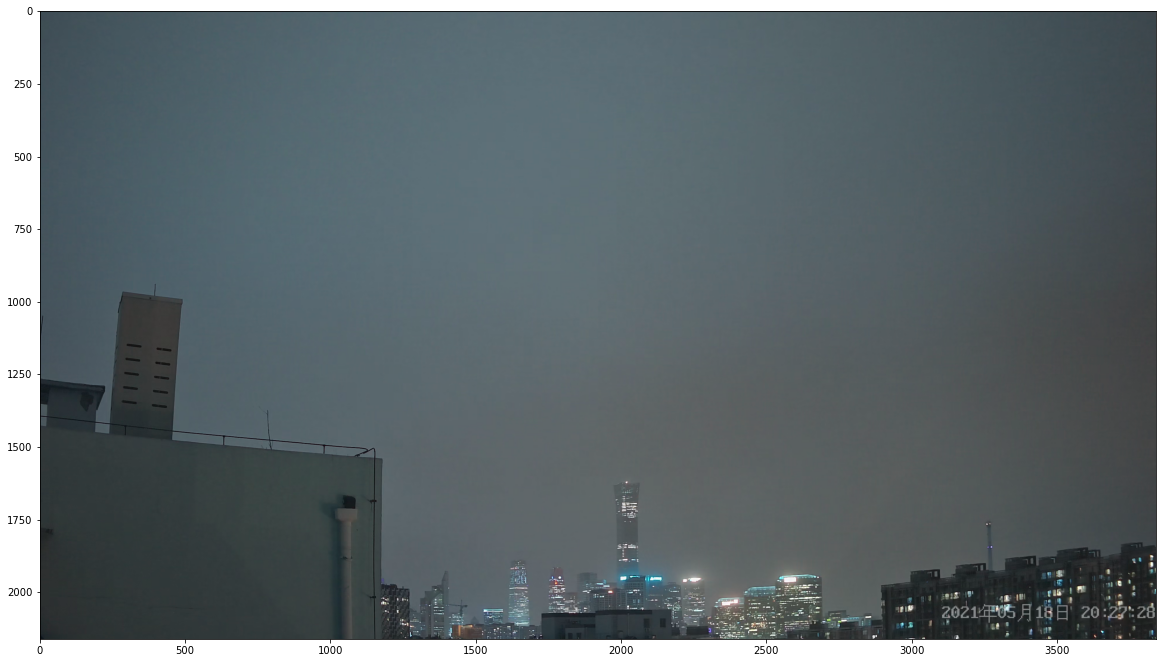

811


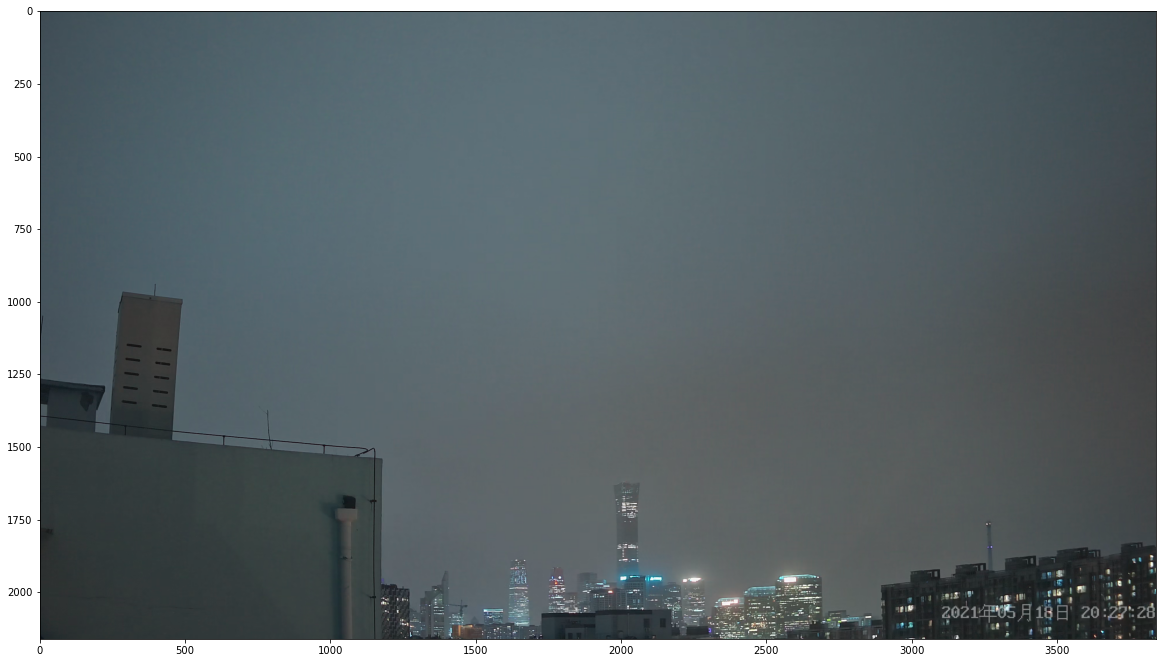

  7%|▋         | 812/11950 [00:29<1:27:14,  2.13it/s]

812


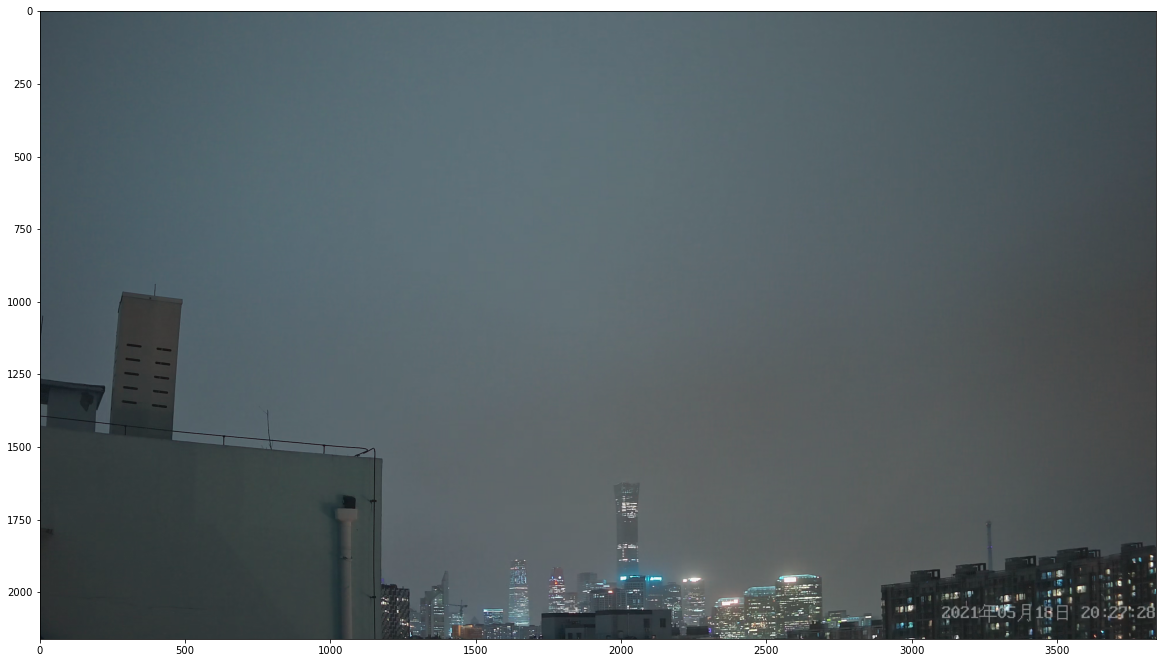

  9%|▊         | 1029/11950 [00:34<06:07, 29.70it/s] 


KeyboardInterrupt: 

In [26]:
vidcap = cv2.VideoCapture(filename)

frame_count = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))

success, frame = vidcap.read()
d = collections.deque(maxlen=10)
sums = []
running_diffs = []
count = 0
for i in tqdm(range(frame_count)):
    frame_d = cv2.resize(frame, (800,600))
    frame_d = cv2.cvtColor(frame_d, cv2.COLOR_BGR2GRAY)/255
    s = np.sum(frame_d)
    sums.append(s)

    d.append(s)
    running_avg = sum(d) / len(d)
    running_diff = s - running_avg
    running_diffs.append(running_diff)
    
    if running_diff > thres:
        print(i)
        plt.imshow(frame)
        plt.show()
        if not cv2.imwrite(f"detected/frame{i:04}.jpg", frame):
            break
    
    success, frame = vidcap.read()
    count += 1
    
#     frame_num = int(vidcap.get(cv2.CAP_PROP_POS_FRAMES))
#     if frame_num % (total_frames/50) == 0:
#         print(f"{frame_num}/{total_frames}")
print(count, frame_count)

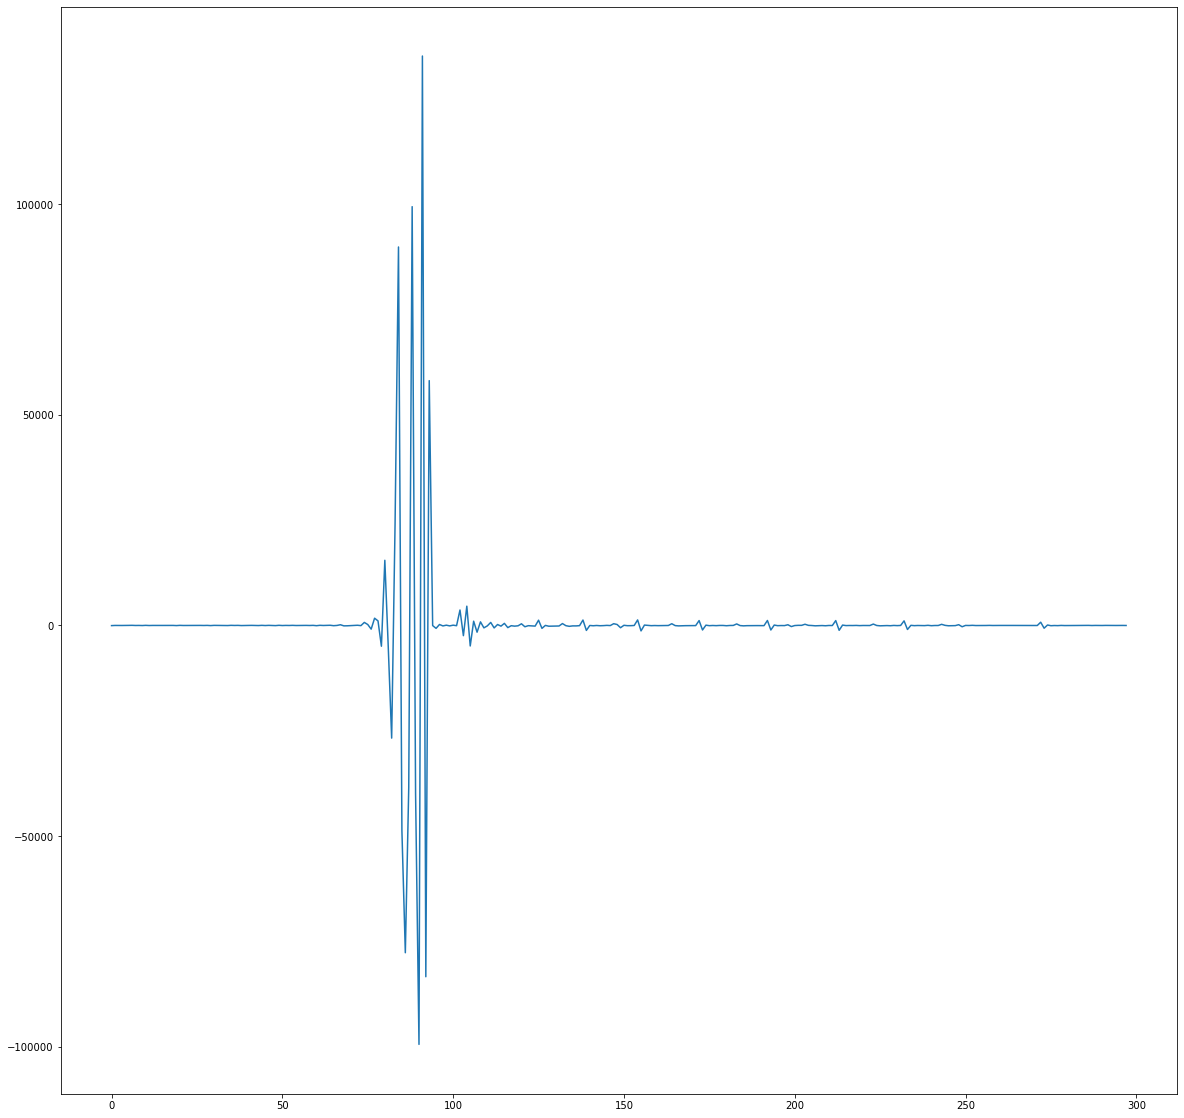

In [38]:
x = sums
plt.plot(x)

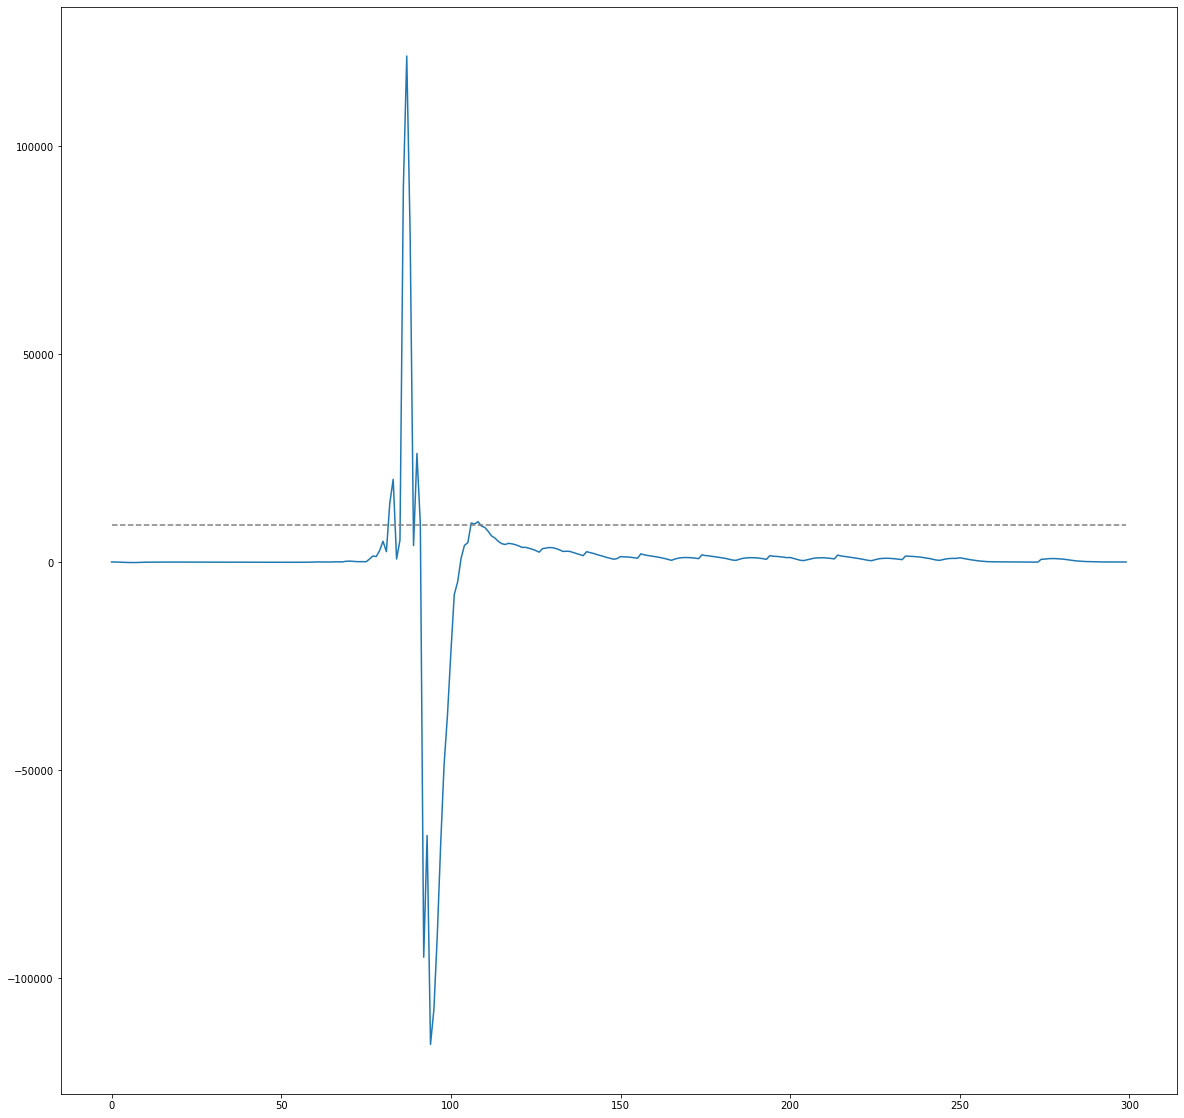

In [31]:
x = running_diffs
plt.plot(x)
plt.plot(np.ones_like(x)*thres, "--", color="gray")

In [8]:
raise

RuntimeError: No active exception to reraise

In [ ]:
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import numpy as np

plt.rcParams["figure.figsize"] = (20,4)

x = np.diff(sums)
# peaks= np.where(x > np.percentile(x, 99.9))[0]
peaks, _ = find_peaks(x, distance=30, height=np.percentile(x, 99.7))
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

In [ ]:
peaks

In [ ]:
cur_frame_num

## DOESN'T WORK WELL BECAUSE OF INTER FRAME COMPRESSION

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
for p in peaks:
    print(p)
    vidcap.set(cv2.CAP_PROP_POS_FRAMES, p-3)
    cur_frame_num = int(vidcap.get(cv2.CAP_PROP_POS_FRAMES))
    while cur_frame_num < p+3:
        ret, frame = vidcap.read()
        plt.imshow(frame)
        plt.show()
        cur_frame_num = int(vidcap.get(cv2.CAP_PROP_POS_FRAMES))
        print(cur_frame_num)
    print("========================")